## 선형회귀모델

 * 훈련 방법 
  * 최소자승법 이용 -> 모델의 parameter를 해석적으로 구한다
  * 경사하강법 이용 -> 모델 parameter를 조금씩 바꾸면서 비용을 최소화

* 선형 회귀 모델 ->  feature에 대한 선형함수 만들어 예측
 * 예측함수 : y^=w[0]* x[0]+ ...+w[p]* x[p] + b -> 입력 특성에 w(가중치)를 곱해서 더한 가중치의 선형 결합
 * (x[i] 는 feature의 각 성분, w,b는 모델이 학습할 매개변수, y^는 예측값)

 * 뉴런의 모델(perceptron)
  * 분류
    * y^ >0 -> output:1
    * y^ <0 -> output:-1
  * 선형결합
    * 값 자체를 이용
  * 입력특성이 1개라면, y^= w[0] * x[0] + b. 특성이 많아지면 각 특성에 해당하는 기울기를 가진다.
  * 카이제곱값이 최소가 되는 m과 b의 값을 찾는 것
  * 입력 특성의 가중치 합 + 편향(bias)(theta)
  * y^ = h(x) = theta^T * X
  * 훈련시키기
    * 파라미터 : 평균제곱오차(RMSE).
    * RMSE(혹은 MSE)를 최소화하는 theta를 찾는 것
    * normal equation = MSE(theta) = 0이 되는 theta를 찾는 식
  

* 다층신경망

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)       #100개의 1차원 데이터를 랜덤 추출
y = 4 + 3 * X + np.random.randn(100, 1) 

In [2]:
import matplotlib.pyplot as plt

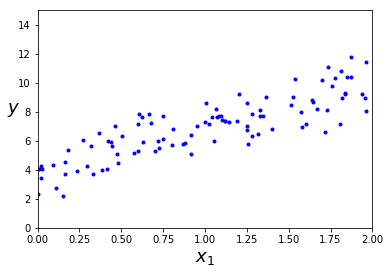

In [3]:
plt.plot(X, y, "b. ")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
#정규방정식을 사용해 theta를 구하자

In [4]:
import numpy.linalg

In [6]:
X_b = np.c_[np.ones((100, 1)), X]    #모든 샘플에 x0=1 을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#선형 대수 모델의 inv() 함수 : 역행렬 구하기
# dot() 함수 : 내적 계산

In [7]:
theta_best

array([[3.95568703],
       [2.99156383]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]   #모든 샘플에 x0 = 1 를 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.95568703],
       [9.93881469]])

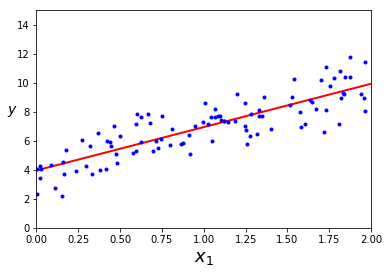

In [9]:
#모델 예측 그래프
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측") #예측선 (빨간색)
plt.plot(X, y, "b.")       #원래 데이터 (파란색)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
#같은 작업을 사이킷런 코드로

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.95568703]), array([[2.99156383]]))

In [12]:
lin_reg.predict(X_new)

array([[3.95568703],
       [9.93881469]])

## 경사하강법

 * 특성이 매우 많고 훈련 샘플이 너무 많을 때 적합(그만큼 한계도 존재)
 * 파라미터를 조정하여 비용함수를 최소화
  * 비용함수가 가장 빨리 감소하는 방향으로 파라미터 조정
  * 비용함수의 그래디언트 이용
 * 방법
  * 무작위 초기화 : theta를 임의의 값으로 시작
  * 한번에 조금씩 비용함수가 감소되는 방향으로 진행
  * 최솟값에 수렴할 때까지 점진적으로 비용함수 감소시킴
 * 훈련시키기
  * 파라미터 : 학습률(learning rate) = 스탭의 크기
  * 문제점 : 모든 비용함수가 볼록함수가 아니다!(예를 들어 다층신경망)  -> 최소값을 잘못 구할 수 있다.
  * 해결 : 모든 특성이 같은 스케일을 갖도록 만들어야함. -> StandardScaler 사용

### 배치 경사 하강법

 * 전체 훈련 세트 X에 대해 계산.
 * 매우 큰 훈련세트에서는 느릴 수 있음
 * but 정규방정식 < 경사하강법
 * 그래디언트 벡터 : 가장 빨리 증가하는 방향이므로 반대방향으로 theta를 움직여야. 여기서 학습률(에타)가 사용.
 * theta(next step) = theta - eta * MSE(theta)

In [13]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta       #정규방정식과 일치

array([[3.95568703],
       [2.99156383]])

 * 반복횟수는 크게 지정했다가 그래디언트 벡터의 크기가 충분히 작아지면 알고리즘 중지

### 확률적 경사 하강법

 * 매 스탭마다 딱 한개의 샘플을 무작위로 선택하고 그 한 샘플의 에러(MSE)를 theta에 대해 편미분(그래디언트)을 계산
 * 확률적이므로 배치 경사 하강법 보다 불안정
 * 적은 데이터 사용으로 알고리즘이 빠름
 * 최적값까지 단조감소 하지 않고 요동치면서 평균적으로 감소 -> 장점일수도 단점일수도

 * 무작위성 :
   * 지역 최솟값 탈출을 돕지만 전역 최솟값에 다다르지 못하게도 함
   * 해결 : 학습률을 점진적으로 감소 -> 전역 최솟값에 도달하도록.

In [15]:
n_epochs = 50  #훈련세트 샘플 수 만큼의 각 반복 = epoch
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):  
    return t0 / (t + t1)
#여기서는 50번 반복하고도 좋은 값에 도달함을 본다 

 * 학습 스케줄( learning schedule) : 매 반복에서 학습률을 결정
 * 학습률이 너무 빨리 줄면 지역 최솟값에 갇히거나 가다 멈출 수 있음
 * 너무 천천히 줄면 오랫동안 최소 주변을 맴돌거나 너무 일찍 중지하여 지역 최솟값에 머물 수 있음

In [16]:
theta = np.random.randn(2,1)     #random initialization

In [17]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor( n_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X,y.ravel())             # ravel 함수 이용 -> 1차원 배열로 평평하게 펴줌

# eta0 = 초기 학습률, n_iter = epoch 수
# 기본 학습 스케줄 공식 = eta0/t^(a)     ( t : 반복횟수, a = 0.25)

C:\Users\digus\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.87906296]), array([2.89671107]))